<a href="https://colab.research.google.com/github/om7503/Multiple-diseases-prediction-System/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


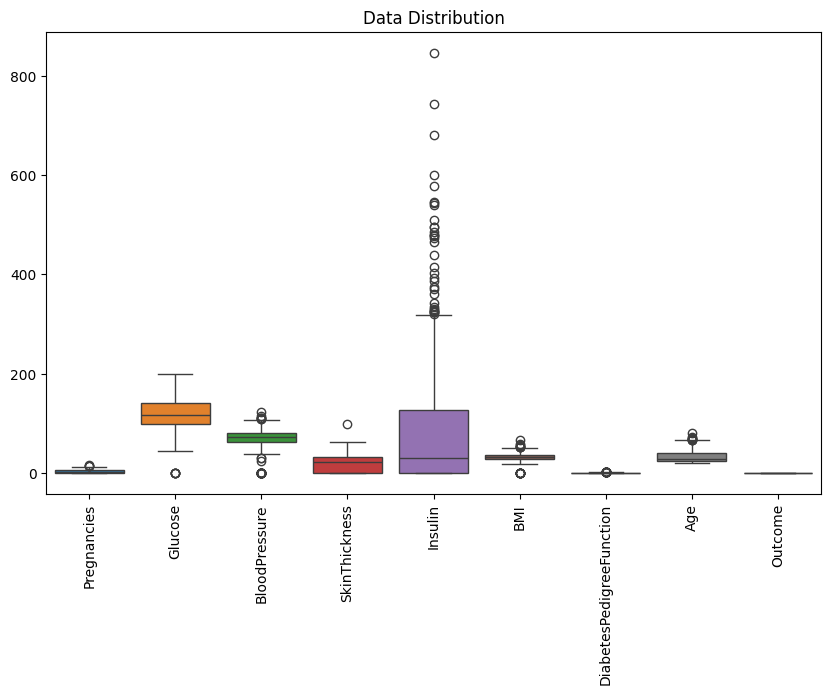

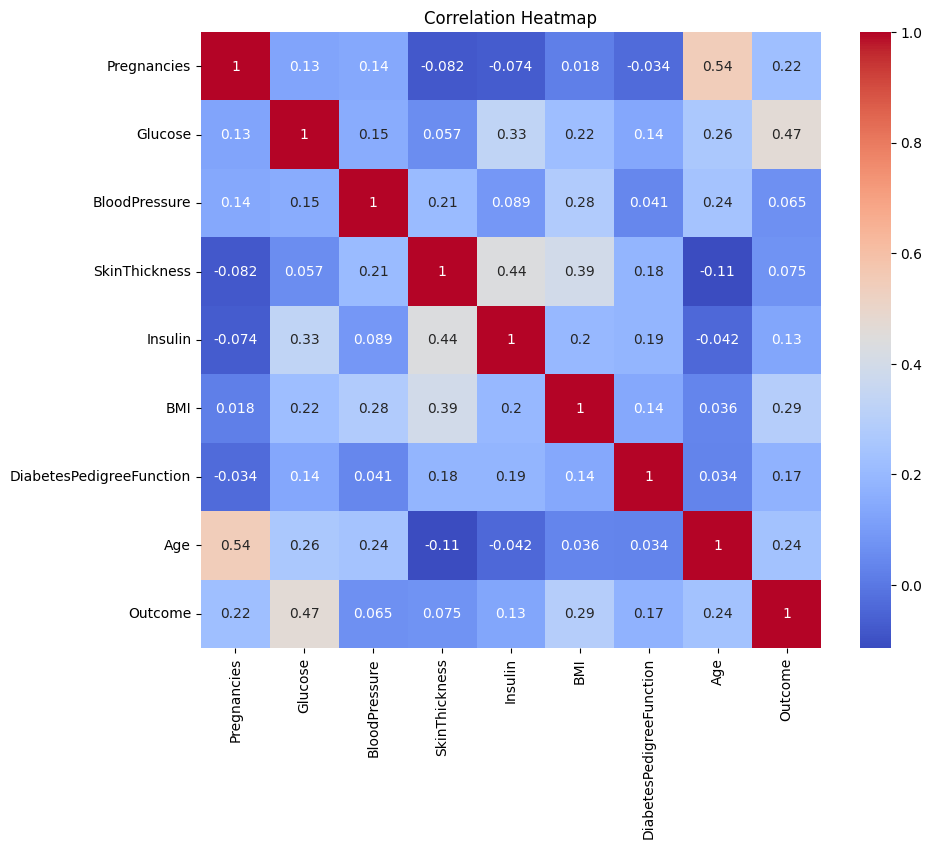

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

# Suppress future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

# Printing the first 5 rows of the dataset
print(diabetes_dataset.head(20))

# Number of rows and Columns in this dataset
print("Dataset shape:", diabetes_dataset.shape)

# Getting the statistical measures of the data
print(diabetes_dataset.describe())

# Class distribution (Outcome: 0 -> Non-Diabetic, 1 -> Diabetic)
print(diabetes_dataset['Outcome'].value_counts())

# Grouping by Outcome and checking the mean of each group
print(diabetes_dataset.groupby('Outcome').mean())

# Separating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

print("Features (X):", X.head())
print("Labels (Y):", Y.head())

# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

# Print the shapes of train and test sets
print("Train and Test shapes:", X_train.shape, X_test.shape)

# Training the Model (SVM with linear kernel)
classifier = svm.SVC(kernel='linear')

# Training the Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

# Model Evaluation - Accuracy Score
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

# Confusion Matrix, Classification Report, and ROC AUC Score
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
class_report = classification_report(Y_test, X_test_prediction)
roc_auc = roc_auc_score(Y_test, X_test_prediction)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC AUC Score:", roc_auc)

# Making a Predictive System
input_data = np.asarray([1,85,66,29,0,26.6,0.351,31])

# Converting the input_data to DataFrame with the same feature names as the original dataset
input_data_df = pd.DataFrame([input_data], columns=X.columns)

# Making the prediction using the trained SVM model
prediction = classifier.predict(input_data_df)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# Saving the trained model
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

# Data Distribution Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_dataset)
plt.title('Data Distribution')
plt.xticks(rotation=90)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


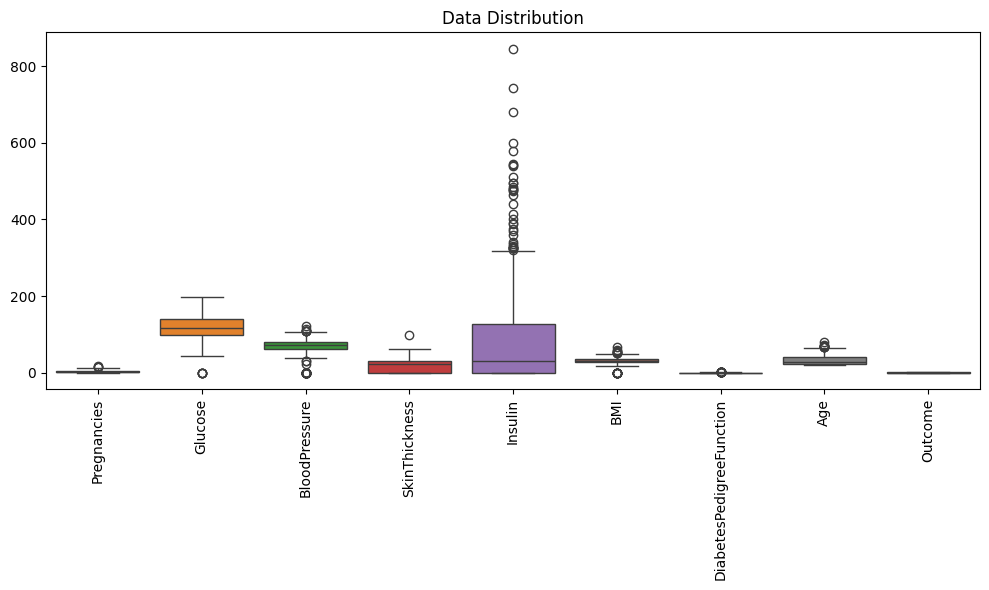

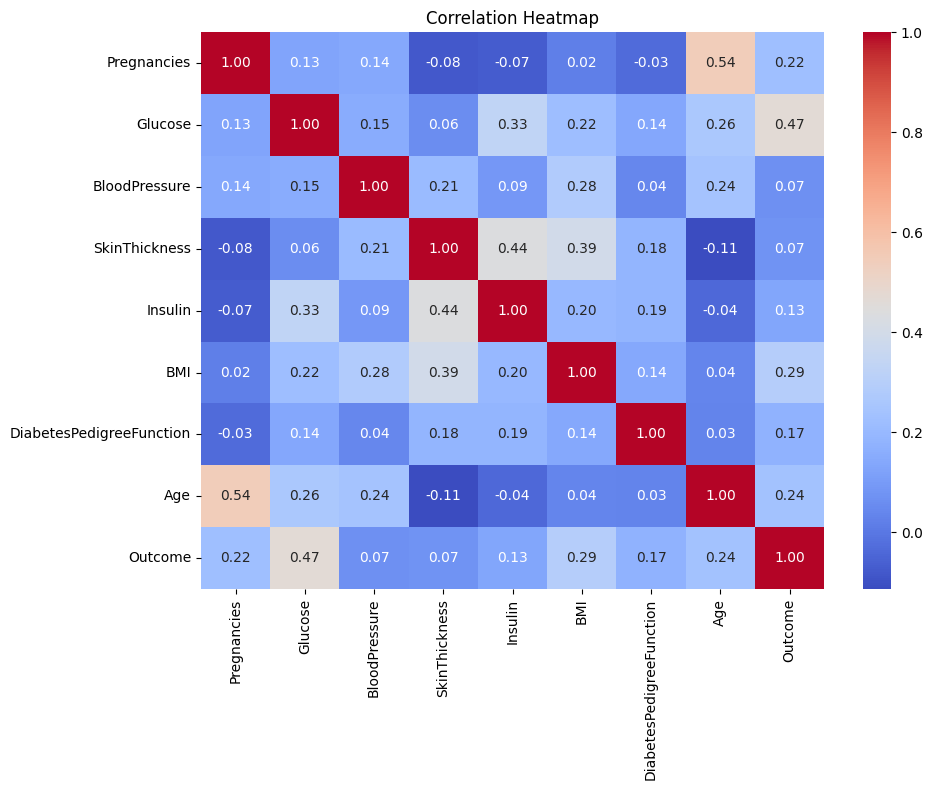

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Distribution Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_dataset)
plt.title('Data Distribution')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts plot to ensure everything fits
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()  # Adjusts plot to ensure everything fits
plt.show()


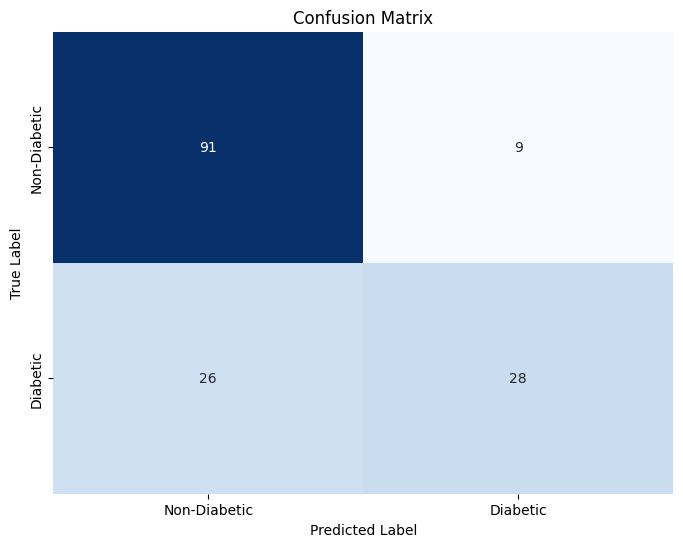

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predictions and actual labels
# X_test_prediction = classifier.predict(X_test)  # Your predictions
# Y_test = actual labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
